# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
# http://api.openweathermap.org/data/2.5/weather?appid=<uniqueAPIkeyhere>&units=metric&q=laguna

query_url = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []

counter = 0
record_counter = 0
setcount = 1

for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print("---------------------------------------")
        print("We've made it to set " + str(setcount) + ".")
        print("We'll reset the record counter to " + str(record_counter) + ".")
        print("So far, we have " + str(counter) + " total records.")
        print("---------------------------------------")
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        weather_response = requests.get(query_url + city).json()
        #pprint(weather_response)
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City not found: " + city)

processing Record 1 of Set 1 | airai
processing Record 2 of Set 1 | albany
processing Record 3 of Set 1 | semporna
processing Record 4 of Set 1 | busselton
processing Record 5 of Set 1 | atbasar
processing Record 6 of Set 1 | ponta do sol
processing Record 7 of Set 1 | puerto ayora
processing Record 8 of Set 1 | vaini
processing Record 9 of Set 1 | karratha
processing Record 10 of Set 1 | caravelas
processing Record 11 of Set 1 | pandamatenga
processing Record 12 of Set 1 | bluff
processing Record 13 of Set 1 | chuy
processing Record 14 of Set 1 | butaritari
processing Record 15 of Set 1 | codajas
processing Record 16 of Set 1 | bonthe
processing Record 17 of Set 1 | severo-kurilsk
processing Record 18 of Set 1 | osakarovka
processing Record 19 of Set 1 | takoradi
processing Record 20 of Set 1 | margate
processing Record 21 of Set 1 | ashtian
processing Record 22 of Set 1 | mataura
processing Record 23 of Set 1 | nisia floresta
processing Record 24 of Set 1 | vista hermosa
processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_data = {'Cities':city_list,
           'Latitude': lat_list,
           'Longitude': lng_list,
           'MaxTemp': max_temp_list,
           'Humidity': humidity_list,
           'Cloudiness': cloudiness_list,
           'WindSpeed': windspeed_list}


In [13]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,Cities,Latitude,Longitude,MaxTemp,Humidity,Cloudiness,WindSpeed
0,Airai,-8.93,125.41,17.69,87,4,0.87
1,Albany,42.65,-73.75,8.33,42,75,8.70
2,Semporna,4.48,118.61,23.00,100,75,1.10
3,Busselton,-33.64,115.35,9.44,80,59,8.69
4,Atbasar,51.81,68.36,-2.33,81,71,2.91


In [14]:
city_csv = city_data_df.to_csv("city_data.csv", index = False, header = True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

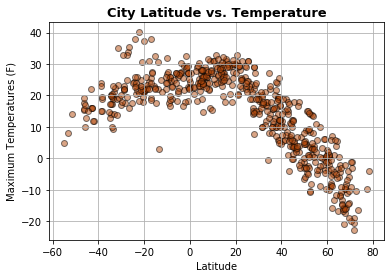

In [18]:
plt.scatter(city_data_df['Latitude'], 
            city_data_df['MaxTemp'], 
            color = '#b54a0d', 
            edgecolor = 'k', 
            alpha = 0.5)
plt.xlabel("Latitude", 
           fontsize = 10)
plt.ylabel("Maximum Temperatures (F)", 
           fontsize = 10)
plt.title("City Latitude vs. Temperature", 
          fontweight = 'bold', 
          fontsize = 13)
plt.grid()

plt.savefig("max_temp.png")

#### Latitude vs. Humidity Plot

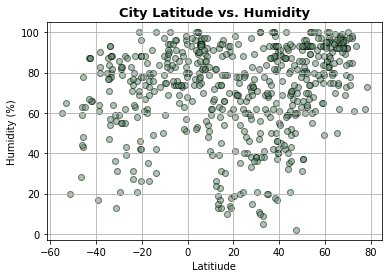

In [17]:
plt.scatter(city_data_df['Latitude'], 
            city_data_df["Humidity"], 
            color = "#5d8f6a", 
            edgecolor = "k", 
            alpha = 0.5)
plt.xlabel("Latitiude", 
           fontsize = 10)
plt.ylabel("Humidity (%)", 
           fontsize = 10)
plt.title("City Latitude vs. Humidity", 
          fontweight = "bold", 
          fontsize = 13)
plt. grid()

plt.savefig("humidity.png")

#### Latitude vs. Cloudiness Plot

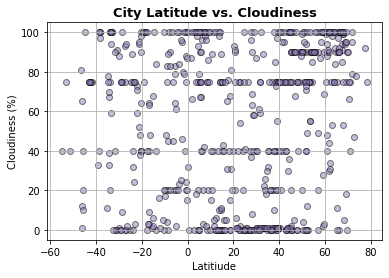

In [20]:
plt.scatter(city_data_df['Latitude'], 
            city_data_df["Cloudiness"], 
            color = "#8e7db8", 
            edgecolor = "k", 
            alpha = 0.5)
plt.xlabel("Latitiude", 
           fontsize = 10)
plt.ylabel("Cloudiness (%)", 
           fontsize = 10)
plt.title("City Latitude vs. Cloudiness", 
          fontweight = "bold", 
          fontsize = 13)
plt. grid()

plt.savefig("cloudiness.png")

#### Latitude vs. Wind Speed Plot

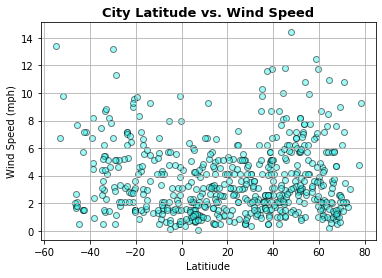

In [23]:
plt.scatter(city_data_df['Latitude'], 
            city_data_df["WindSpeed"], 
            color = "#41faf4", 
            edgecolor = "k", 
            alpha = 0.5)
plt.xlabel("Latitiude", 
           fontsize = 10)
plt.ylabel("Wind Speed (mph)", 
           fontsize = 10)
plt.title("City Latitude vs. Wind Speed", 
          fontweight = "bold", 
          fontsize = 13)
plt. grid()

plt.savefig("windspeed.png")